In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install quandl
import quandl

In [ ]:
data = quandl.get("NSE/TATAGLOBAL")

In [ ]:
data.head(10)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.1,123.00,121.05,121.10,121.55,658666.0,803.56
2010-07-22,120.3,122.00,120.25,120.75,120.90,293312.0,355.17
2010-07-23,121.8,121.95,120.25,120.35,120.65,281312.0,340.31
2010-07-26,120.1,121.00,117.10,117.10,117.60,658440.0,780.01
2010-07-27,117.6,119.50,112.00,118.80,118.65,586100.0,694.98
2010-07-28,118.0,120.50,117.20,118.15,118.25,835593.0,994.01
2010-07-29,112.5,121.70,112.50,117.50,116.60,2359134.0,2791.03
2010-07-30,116.5,118.00,114.60,115.85,116.05,2656191.0,3112.68
2010-08-02,117.3,118.50,116.60,118.10,117.30,663593.0,779.85


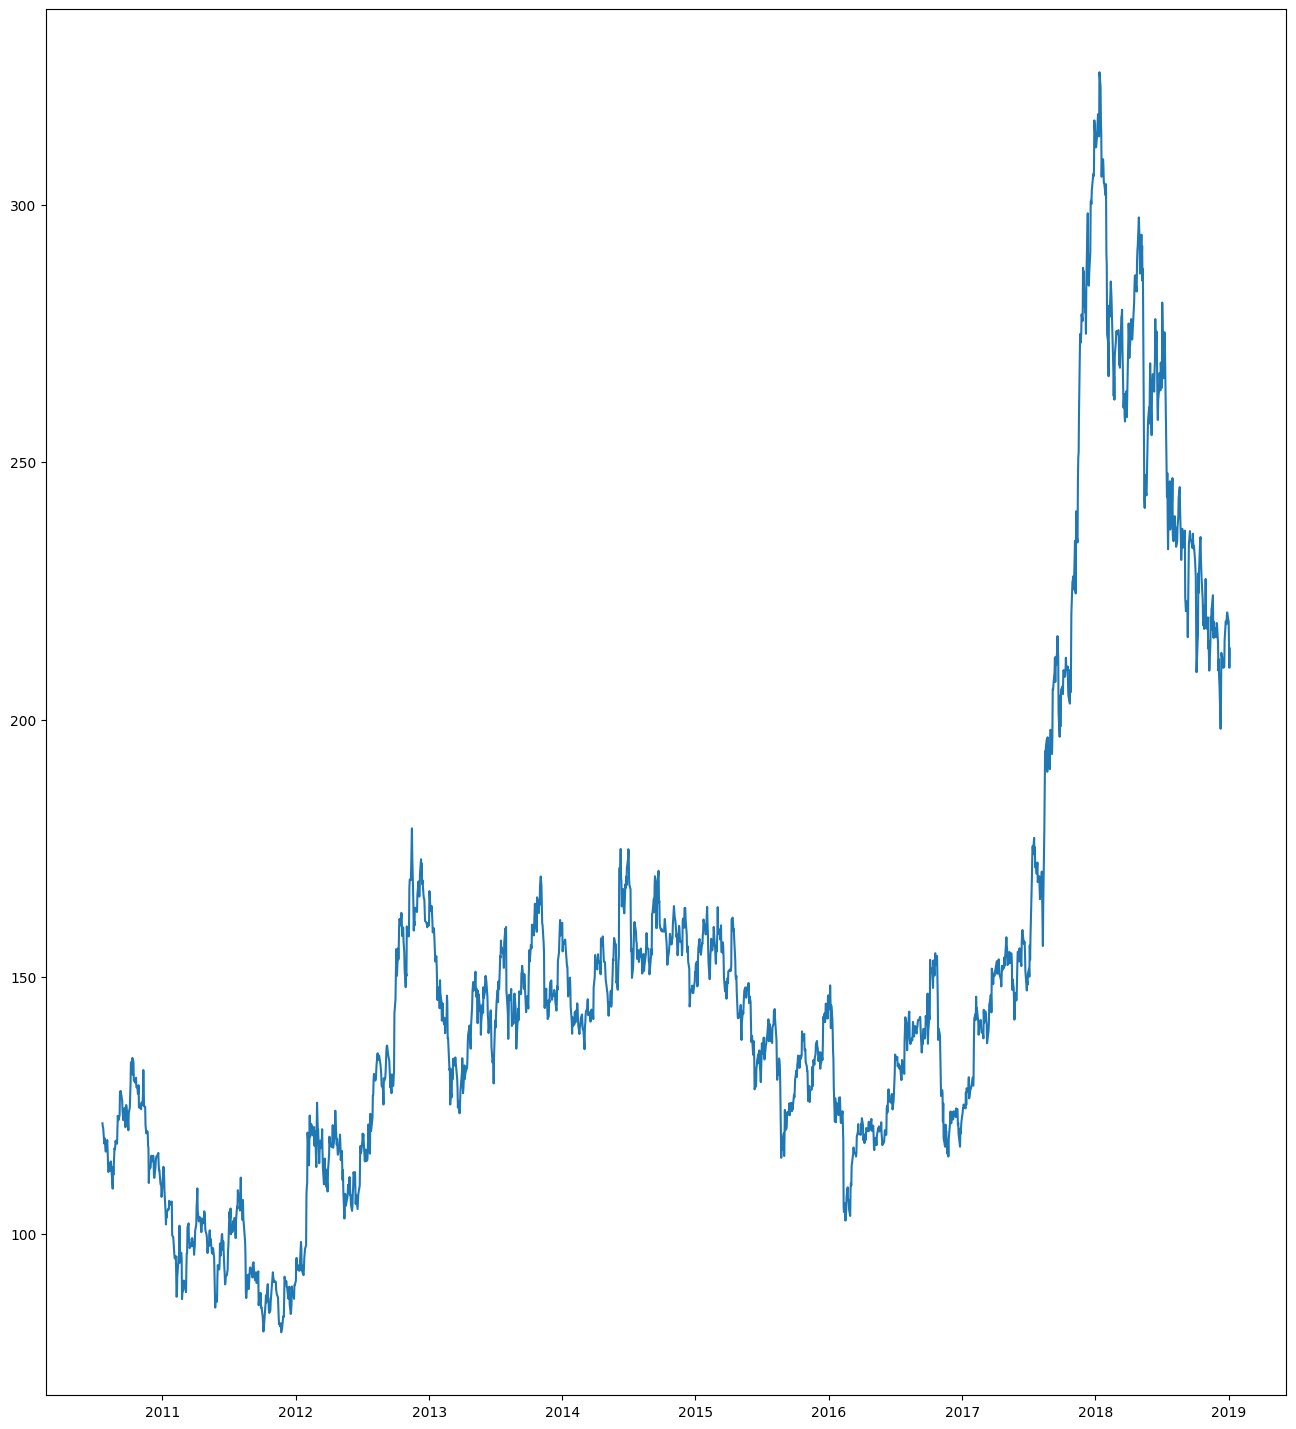

In [ ]:
plt.figure(figsize=(16,18))
plt.plot(data['Close'],label=['Closing Price'])

Classification : Predict whether buy (+1) or sell stock (-1)

In [ ]:
data[ 'Open - Close'] = data[ 'Open'] - data[ 'Close' ]
data[ 'High - Low'] = data['High'] - data['Low']
data = data.dropna()

In [ ]:
X = data[['Open - Close', 'High - Low']]
X.head()

,Open - Close,High - Low
Date,,
2010-07-21,0.55,1.95
2010-07-22,-0.60,1.75
2010-07-23,1.15,1.70
2010-07-26,2.50,3.90
2010-07-27,-1.05,7.50


In [ ]:
Y= np.where(data[ 'Close'].shift(-1)>data['Close'],1,-1)

In [ ]:
Y

array([-1, -1, -1, ..., -1,  1, -1])

Splitting data into 2 parts i.e training and testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state = 44)

Imlementation of KNN Classfier


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#using gridsearch to find the best parameter
params = {'n_neighbors': [2,3,4, 5,6,7,8,9,10,11, 12,13,14,151]}
knn = neighbors. KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5)

# fit the model
model. fit(X_train, y_train)

# Accuracy Score
accuracy_train = accuracy_score(y_train, model.predict(X_train))
accuracy_test = accuracy_score(y_test, model.predict(X_test))
print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.68
Test_data Accuracy: 0.51


In [ ]:
y=data['Close']
y

,Close
Date,
2010-07-21,121.55
2010-07-22,120.90
2010-07-23,120.65
2010-07-26,117.60
2010-07-27,118.65
...,...
2018-12-31,219.40
2019-01-01,219.10
2019-01-02,214.60


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.25, random_state=44)

#using gridsearch to find the best parameter
params = {'n_neighbors': [2,3,4,5, 6, 7,8,9,10,11, 12, 13,14,15]}
knn_reg = neighbors. KNeighborsRegressor()
model_reg = GridSearchCV(knn_reg, params, cv=5)

#fit the model and make predictions model_reg. fit(X_train_reg,y_train_reg)
model_reg.fit(X_train_reg, y_train_reg)
predictions = model_reg.predict(X_test_reg)

In [ ]:
print(predictions)

[111.27       142.19       138.59666667 150.4        186.53
 135.12333333 151.13666667 141.71333333 118.66333333 144.59333333
 160.44333333 140.72       156.5        207.73666667 132.97
 207.62       111.35333333 134.16       132.28666667 138.60666667
 161.86666667 131.26       121.99333333 135.12333333 164.45666667
 216.39       135.43666667 137.07       162.64       128.51
 141.51333333 129.99666667 152.64666667 134.33333333 196.32333333
 120.84333333 156.49333333 157.4        145.47       132.08333333
 122.75666667 128.77       130.84333333 159.17666667 167.54666667
 168.98       189.31333333 184.33       187.08333333 130.23666667
 141.33333333 136.24       130.08       162.26333333 152.51333333
 124.14       134.20333333 139.87666667 113.61666667 137.07
 136.69       120.16666667 205.71333333 122.48333333 141.50666667
 136.37666667 114.93       132.82666667 181.68       125.15666667
 136.37666667 211.39333333 174.05333333 162.33333333 131.89666667
 131.15666667 124.06       134.61 

In [ ]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(predictions)),2)))

In [ ]:
valid = pd.DataFrame({'Actual Close':y_test_reg, 'Predicted Close value':predictions})

In [ ]:
valid.head(10)

,Actual Close,Predicted Close value
Date,,
2015-03-17,156.70,111.270000
2015-09-07,120.45,142.190000
2013-02-18,141.90,138.596667
2013-07-05,145.15,150.400000
2018-03-15,279.60,186.530000
2017-01-19,130.50,135.123333
2013-11-26,145.50,151.136667
2012-12-17,165.65,141.713333
2016-07-11,133.10,118.663333


APPROACH 2 (Using XGBBoost as linear Regression)

In [ ]:
#Import the libraries
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('spy.csv')

In [ ]:
data

,Date,Open,High,Low,Close,Volume,Day,Weekday,Week,Month,Year
0,29/01/93,24.701659,24.701659,24.578765,24.684103,1003200,29,4,4,1,1993
1,01/02/93,24.701659,24.859665,24.701659,24.859665,480500,1,0,5,2,1993
2,02/02/93,24.842106,24.929887,24.789437,24.912331,201300,2,1,5,2,1993
3,03/02/93,24.947439,25.193227,24.929883,25.175671,529400,3,2,5,2,1993
4,04/02/93,25.263446,25.333671,24.982546,25.281002,531500,4,3,5,2,1993
...,...,...,...,...,...,...,...,...,...,...,...
7927,25/07/24,541.349976,547.460022,537.450012,538.409973,61158300,25,3,30,7,2024
7928,26/07/24,542.280029,547.190002,541.489990,544.440002,53763800,26,4,30,7,2024
7929,29/07/24,546.020019,547.049988,542.719971,544.760010,39515800,29,0,31,7,2024
7930,30/07/24,546.260010,547.340027,538.520019,542.000000,46853600,30,1,31,7,2024


<Axes: >

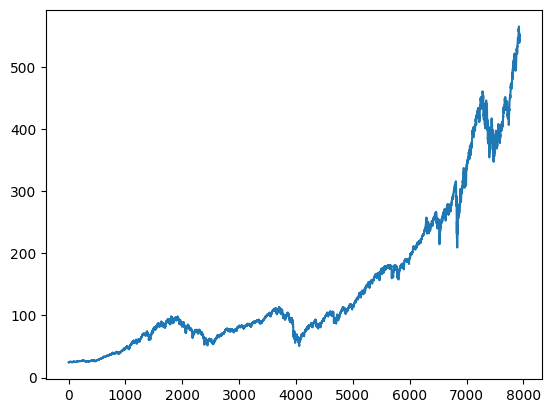

In [ ]:
data['Close'].plot()

In [ ]:
#Split the data into training and testing data sets
train_data = data.iloc[:int(.99*len(data)), :]
test_data = data.iloc[int(.99*len(data)):,:]

In [ ]:
#Define features and target variable
features = ['Open','Volume']
target='Close'

In [ ]:
#Training the model on regression basis
model=xgb.XGBRegressor()
model.fit(train_data[features],train_data[target])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
#Make and show the predictions on the test data
predictions = model.predict(test_data[features])
print('Model Predictions:')
print(predictions)

Model Predictions:
[509.32004 507.66794 518.09753 516.8898  518.4288  513.4925  516.1957
 504.5767  516.1957  485.91153 483.9559  515.12866 505.9929  486.86575
 517.51904 507.9135  510.53705 517.06244 514.5681  510.09933 508.0555
 516.3663  508.33817 508.33817 516.3663  508.72897 503.4341  516.44495
 504.35132 514.9212  508.72897 508.55115 509.32004 504.36578 508.33817
 508.3512  507.86087 507.9135  506.4668  508.1326  508.3512  508.0555
 508.55115 508.33817 508.3512  508.3512  516.059   507.86087 508.04938
 505.9929  508.33817 516.8898  515.12866 507.86087 508.72897 508.66507
 508.3512  504.5767  508.04938 508.04938 508.55115 508.33817 508.3512
 509.66928 508.66507 512.14343 512.14343 508.04938 508.3512  504.36578
 505.77322 514.08386 508.33817 508.3512  516.1957  513.4421  510.51788
 508.06964 508.1326  513.37805]


In [ ]:
#Show the actual values
print( 'Actual Values: ')
print (test_data[target])

Actual Values: 
7852    517.051880
7853    517.650024
7854    512.466736
7855    516.334228
7856    509.207245
           ...    
7927    538.409973
7928    544.440002
7929    544.760010
7930    542.000000
7931    550.809998
Name: Close, Length: 80, dtype: float64


In [ ]:
#Show the models accuracy
accuracy = model.score(test_data[features], test_data[target])
print ('Accuracy: ')
print (accuracy)

Accuracy: 
-1.3033262641415533


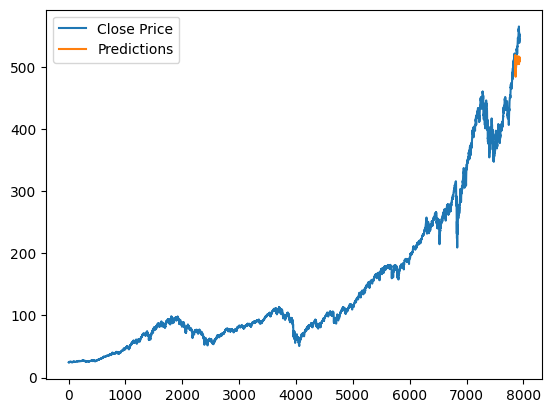

In [ ]:
#Plot the predictions and the close price
plt.plot(data[ 'Close'], label = 'Close Price')
plt.plot(test_data[target].index, predictions, label = 'Predictions')
plt. legend ()
plt.show()